/tmp/ipykernel_72910/1709964640.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Date", y="Price", data=df_melted, palette="Set2", showfliers=True)


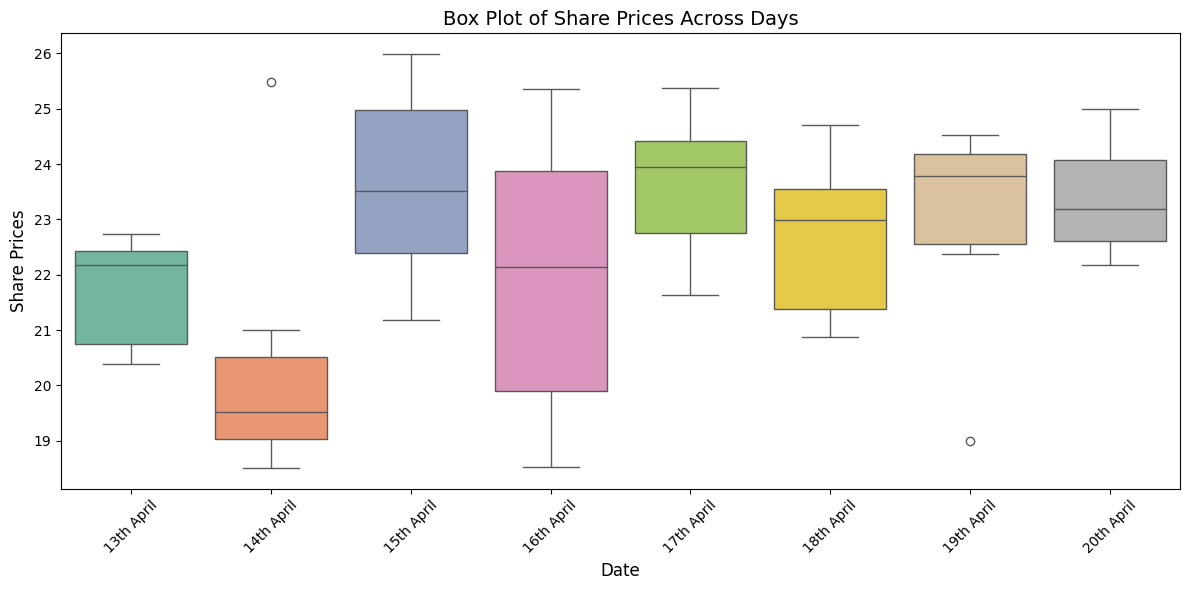

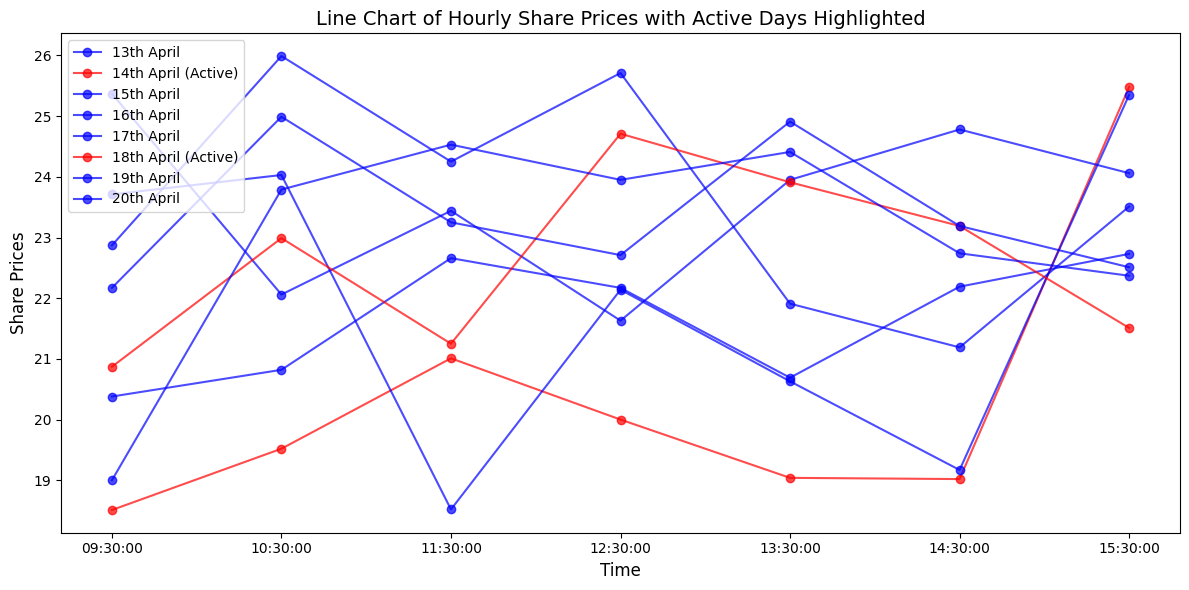

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the excel file
data = pd.read_excel('SharePrice.xlsx')
# Data is already clean in our example but simulating the requested operation for clarity
df_cleaned = data.iloc[2:,1:].reset_index(drop=True)

# Resetting the first row as the header
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned[1:].reset_index(drop=True)

# Re-melting the cleaned data for plottin
# Ensuring that the Time column is treated as a string for plotting
# Convert to DataFrame
df = pd.DataFrame(df_cleaned)

# Melting the data for easier plotting
df_melted = df.melt(id_vars=["Date"], var_name="Time", value_name="Price")
# Ensuring that the Time column is treated as a string for plotting
df_melted["Time"] = df_melted["Time"].astype(str)

# Highlighting days where Elizabeth was active
active_days = ["14th April", "18th April"]

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Date", y="Price", data=df_melted, palette="Set2", showfliers=True)
plt.title("Box Plot of Share Prices Across Days", fontsize=14)
plt.ylabel("Share Prices", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("box_plot_share_prices.png")
plt.show()

# Line Chart with Highlighted Points
plt.figure(figsize=(12, 6))
for date in df["Date"]:
    subset = df_melted[df_melted["Date"] == date]
    color = "red" if date in active_days else "blue"
    label = f"{date} {'(Active)' if date in active_days else ''}"
    plt.plot(subset["Time"], subset["Price"], marker="o", label=label, color=color, alpha=0.7)

plt.title("Line Chart of Hourly Share Prices with Active Days Highlighted", fontsize=14)
plt.ylabel("Share Prices", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.legend(fontsize=10, loc="upper left")
plt.tight_layout()
plt.savefig("line_chart_share_prices.png")
plt.show()



## Conclusion: 
Our visualizations effectively highlight unusual trading activity on 14th and 18th April, the days Elizabeth was active.

The box plot reveals significant outliers in share prices on these days, indicating abnormal deviations compared to other days. The line chart further emphasizes this irregularity by showing sharp fluctuations on 14th April and a distinct price spike towards the end of the trading hours on 18th April.

This clear distinction between active and inactive days supports the suspicion of manipulated trading patterns. These findings provide strong evidence to justify further investigation into trading behavior on these specific days.